In [ ]:
'''
Course Name: Pattern Recognition Lab
Course Number: CSE 4214
Experiment no. 2: Implementing the Perceptron algorithm for finding the weights of a Linear Discriminant function

Name: Humaira Zahin Mauni
Section: A1
ID: 160104012
'''

'\nCourse Name: Pattern Recognition Lab\nCourse Number: CSE 4214\nExperiment no. 2: Implementing the Perceptron algorithm for finding the weights of a Linear Discriminant function\n\nName: Humaira Zahin Mauni\nSection: A1\nID: 160104012\n'

In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files


In [2]:
## Q1
uploaded = files.upload() #upload train.txt

Saving train.txt to train.txt


In [3]:
df_train = pd.read_csv(io.BytesIO(uploaded['train.txt'] ), sep=" " ,  header = None, dtype = 'float64')
df_train.columns = ['x1', 'x2', 'label']
print(df_train)

    x1   x2  label
0  1.0  1.0    1.0
1  1.0 -1.0    1.0
2  2.0  2.5    2.0
3  0.0  2.0    2.0
4  2.0  3.0    2.0
5  4.0  5.0    1.0


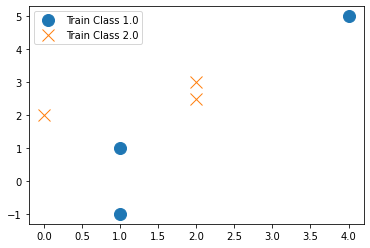

In [4]:
groups = df_train.groupby('label')

fig, ax = plt.subplots()
for name, group in groups:
  mar = 'x'
  if name == 1.0:
    mar = 'o'
  name = 'Train Class ' + str(name)
  ax.plot(group.x1, group.x2, marker= mar, linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [5]:
#Q2

data = np.zeros(shape=(6,6))
for i in range(6):
    data[i][0] = df_train.x1[i]**2
    data[i][1] = df_train.x2[i]**2
    data[i][2] = df_train.x1[i]*df_train.x2[i]
    data[i][3] = df_train.x1[i]
    data[i][4] = df_train.x2[i]
    data[i][5] = 1
print(data)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [ 4.    6.25  5.    2.    2.5   1.  ]
 [ 0.    4.    0.    0.    2.    1.  ]
 [ 4.    9.    6.    2.    3.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]]


In [6]:
for i in range(6):
  if df_train.label[i] == 2.0:
    data[i] = -1 * data[i]
print(data)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]
 [16.   25.   20.    4.    5.    1.  ]]


In [7]:
# Q3 and Q4
def one_update(learning_rate, activation, weight, data):
  counter = 0
  while counter < 200:
    counter += 1
    #print("\ncounter: ", counter)
    flag = 0
    for i in range(6):
      activation = np.dot(data[i], np.transpose(weight))
      if activation <= 0:
        weight[0] = weight[0] + learning_rate*data[i]
      if activation > 0:
        flag = flag + 1
      #print("i: ", i)
      #print("activation: ", activation)
    if (flag==6): break
  #print("\n\nANSWER:")
  #print("flag : ", flag)
  #print("weight: ", weight)
  #print("counter: ", counter)
  return weight, counter

In [8]:
def batch_update(learning_rate, activation2, weight2, data):
  counter = 0
  temp = 0
  while counter < 200:
    temp = 0
    counter += 1
    #print("\ncounter: ", counter)
    flag = 0
    for i in range(6):
      activation2 = np.dot(data[i], np.transpose(weight2))
      if activation2 <= 0:
        temp = temp + data[i]
      if activation2 > 0:
        flag = flag + 1
      #print("i: ", i)
      #print("activation: ", activation2)
    if (flag==6): break
    weight2[0] = weight2[0] + learning_rate*temp
  #print("\n\nANSWER:")
  #print("flag : ", flag)
  #print("weight: ", weight2)
  #print("counter: ", counter)
  return weight2, counter


-----Initial Weight Vector All One:----- 


Learning rate:  0.1
	--single update--
	Weights:  [[ 1.    -1.025  0.7    0.2   -0.75   0.1  ]] 
	Iterations:  6

	--batch update--
	Weights:  [[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]] 
	Iterations:  102

Learning rate:  0.2
	--single update--
	Weights:  [[ 13.8  -9.1   6.2  -2.2 -12.8   4.6]] 
	Iterations:  147

	--batch update--
	Weights:  [[ 13.    -8.85   5.6   -1.   -10.9    2.4 ]] 
	Iterations:  104

Learning rate:  0.30000000000000004
	--single update--
	Weights:  [[ 20.8  -13.55   8.8   -3.2  -19.7    7.  ]] 
	Iterations:  149

	--batch update--
	Weights:  [[ 17.8   -11.825   7.9    -1.4   -15.05    2.8  ]] 
	Iterations:  91

Learning rate:  0.4
	--single update--
	Weights:  [[ 27.8 -18.   11.8  -4.2 -26.2   9.4]] 
	Iterations:  149

	--batch update--
	Weights:  [[ 26.6 -18.   11.4  -2.2 -22.6   5.4]] 
	Iterations:  116

Learning rate:  0.5
	--single update--
	Weights:  [[ 33.   -19.75  14.    -6.   -31.5   10.5 ]] 
	Iterations: 

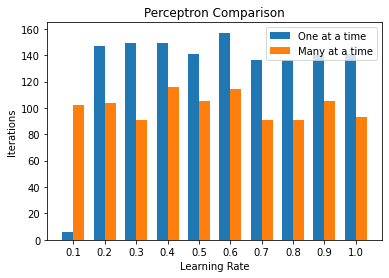

In [9]:
results=[]
results2=[]
models=[]
# weight = [1 1 1 1 1 1]
print("\n-----Initial Weight Vector All One:----- \n")
for i in range(10):
  learning_rate = 0.1 + (i*0.1)
  weights, iterations = one_update(learning_rate, np.zeros((1,6), dtype=float), np.ones((1,6), dtype=float), data)
  print("\nLearning rate: ", learning_rate )
  print("\t--single update--\n\tWeights: ", weights, "\n\tIterations: ",iterations)
  results.append(iterations)

  weights2, iterations2 = batch_update(learning_rate, np.zeros((1,6), dtype=float), np.ones((1,6), dtype=float), data)
  print("\n\t--batch update--\n\tWeights: ", weights2,"\n\tIterations: ",iterations2)
  results2.append(iterations2)
  models.append("" +str(np.around(learning_rate, decimals=1)))

# table

from tabulate import tabulate
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


col_headers = ["Alpha (Learning Rate)", "One at a time", "Many at a time"]

merged_array = np.array([x, results, results2]).T
table = tabulate(merged_array , col_headers, tablefmt="fancy_grid", floatfmt = ".2f")
print(table)

# graph
objects = models
x = np.arange(len(objects))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results, width, label='One at a time')
rects2 = ax.bar(x + width/2, results2, width, label='Many at a time')

ax.set_ylabel('Iterations')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
plt.xlabel('Learning Rate')
ax.set_xticklabels(objects)
ax.legend()

plt.show()


-----Initial Weight Vector All Zero:----- 


Learning rate:  0.1
	--single update--
	Weights:  [[ 6.6  -3.95  2.8  -1.2  -6.3   2.1 ]] 
	Iterations:  141

	--batch update--
	Weights:  [[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]] 
	Iterations:  105

Learning rate:  0.2
	--single update--
	Weights:  [[ 13.2  -7.9   5.6  -2.4 -12.6   4.2]] 
	Iterations:  141

	--batch update--
	Weights:  [[ 13.    -8.85   5.6   -1.   -10.9    2.4 ]] 
	Iterations:  105

Learning rate:  0.30000000000000004
	--single update--
	Weights:  [[ 19.8  -11.85   8.4   -3.6  -18.9    6.3 ]] 
	Iterations:  141

	--batch update--
	Weights:  [[ 18.    -11.625   7.5    -1.2   -15.45    3.   ]] 
	Iterations:  92

Learning rate:  0.4
	--single update--
	Weights:  [[ 26.4 -15.8  11.2  -4.8 -25.2   8.4]] 
	Iterations:  141

	--batch update--
	Weights:  [[ 26.  -17.7  11.2  -2.  -21.8   4.8]] 
	Iterations:  105

Learning rate:  0.5
	--single update--
	Weights:  [[ 33.   -19.75  14.    -6.   -31.5   10.5 ]] 
	Iterations:  14

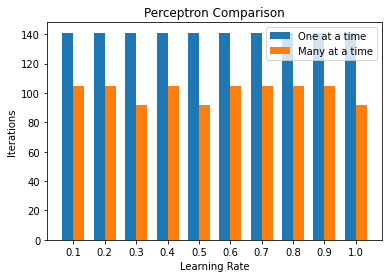

In [10]:
results=[]
results2=[]
models=[]
# weight = [0 0 0 0 0 0]

print("\n-----Initial Weight Vector All Zero:----- \n")

for i in range(10):
  learning_rate = 0.1 + (i*0.1)
  weights, iterations = one_update(learning_rate, np.zeros((1,6), dtype=float), np.zeros((1,6), dtype=float), data)
  print("\nLearning rate: ", learning_rate )
  print("\t--single update--\n\tWeights: ", weights, "\n\tIterations: ",iterations)
  results.append(iterations)

  weights2, iterations2 = batch_update(learning_rate, np.zeros((1,6), dtype=float), np.zeros((1,6), dtype=float), data)
  print("\n\t--batch update--\n\tWeights: ", weights2,"\n\tIterations: ",iterations2)
  results2.append(iterations2)
  models.append("" +str(np.around(learning_rate, decimals=1)))

# table

from tabulate import tabulate
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


col_headers = ["Alpha (Learning Rate)", "One at a time", "Many at a time"]

merged_array = np.array([x, results, results2]).T
table = tabulate(merged_array , col_headers, tablefmt="fancy_grid", floatfmt = ".2f")
print(table)

# graph
objects = models
x = np.arange(len(objects))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results, width, label='One at a time')
rects2 = ax.bar(x + width/2, results2, width, label='Many at a time')

ax.set_ylabel('Iterations')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
plt.xlabel('Learning Rate')
ax.set_xticklabels(objects)
ax.legend()

plt.show()


-----Initial Weight Vector random:----- 


Learning rate:  0.1
	--single update--
	Weights:  [[ 6.96509192 -4.29932258  3.14171498 -1.18253014 -6.71380795  2.24044156]] 
	Iterations:  150

	--batch update--
	Weights:  [[ 6.76132958 -4.45763405  3.16496174 -0.71756745 -6.07679786  1.33681269]] 
	Iterations:  116

Learning rate:  0.2
	--single update--
	Weights:  [[ 13.1957749   -8.33257156   5.68512627  -2.31521831 -12.36606218
    4.65327899]] 
	Iterations:  142

	--batch update--
	Weights:  [[10.8548261  -7.28477366  4.84340115 -0.62395938 -8.90405639  1.3289041 ]] 
	Iterations:  77

Learning rate:  0.30000000000000004
	--single update--
	Weights:  [[ 20.35937198 -12.70668109   8.58227858  -3.69616923 -19.50427018
    7.58501574]] 
	Iterations:  149

	--batch update--
	Weights:  [[ 20.04839518 -13.61135288   8.86233835  -1.72096661 -17.32911361
    4.07150982]] 
	Iterations:  117

Learning rate:  0.4
	--single update--
	Weights:  [[ 25.43746203 -15.84784395  10.66062558  -4.75193202 

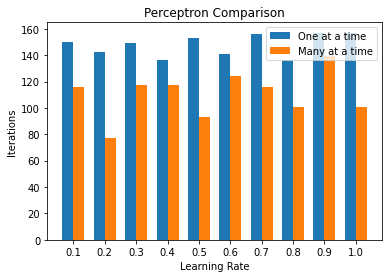

In [11]:
# weight = random 

results=[]
results2=[]
models=[]

print("\n-----Initial Weight Vector random:----- \n")

for i in range(10):
  learning_rate = 0.1 + (i*0.1)
  weights, iterations = one_update(learning_rate, np.zeros((1,6), dtype=float), np.random.sample(size =(1, 6)) , data)
  print("\nLearning rate: ", learning_rate )
  print("\t--single update--\n\tWeights: ", weights, "\n\tIterations: ",iterations)
  results.append(iterations)

  weights2, iterations2 = batch_update(learning_rate, np.zeros((1,6), dtype=float), np.random.sample(size =(1, 6)) , data)
  print("\n\t--batch update--\n\tWeights: ", weights2,"\n\tIterations: ",iterations2)
  results2.append(iterations2)
  models.append("" +str(np.around(learning_rate, decimals=1)))

# table

from tabulate import tabulate
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


col_headers = ["Alpha (Learning Rate)", "One at a time", "Many at a time"]

merged_array = np.array([x, results, results2]).T
table = tabulate(merged_array , col_headers, tablefmt="fancy_grid", floatfmt = ".2f")
print(table)

# graph
objects = models
x = np.arange(len(objects))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results, width, label='One at a time')
rects2 = ax.bar(x + width/2, results2, width, label='Many at a time')

ax.set_ylabel('Iterations')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
plt.xlabel('Learning Rate')
ax.set_xticklabels(objects)
ax.legend()

plt.show()